In [21]:
import pandas as pd
import numpy as np

import scipy.stats as stats
from scipy.stats import norm
import statistics

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

Visuals and Statistics
-
1. Load Data
2. Annual Funding
3. Call Volume Over Time
4. Average Number of Calls per Dollar of Funding
5. P-values
6. Z-score

In [22]:
# Load data 
monthly_calls = pd.read_csv('monthly_call.csv')
daily_calls = pd.read_csv('daily_call.csv')

finance_data = pd.read_csv('new_call.csv')

In [23]:
display(monthly_calls.tail(), daily_calls.tail(), finance_data)

,PrimaryUnitCallSign,Year_Month,Call_Volume
115,Police,2020-08-01,11233
116,Police,2020-09-01,10627
117,Police,2020-10-01,11069
118,Police,2020-11-01,9933
119,Police,2020-12-01,9850


,PrimaryUnitCallSign,Year_Month_Day,Call_Volume
3649,Police,2020-12-27,304
3650,Police,2020-12-28,270
3651,Police,2020-12-29,334
3652,Police,2020-12-30,403
3653,Police,2020-12-31,378


,Year,Agency,Funding,Call_Volume,Call_Per_Funding
0,2016,Police,68070650.0,119940,0.001762
1,2017,Police,57362278.0,117257,0.002044
2,2018,Police,57810827.0,114386,0.001979
3,2019,Police,62652581.0,120843,0.001929
4,2020,Police,72503299.0,132241,0.001824
5,2016,White Bird,4985971.0,9473,0.001900
6,2017,White Bird,5998989.0,11738,0.001957
7,2018,White Bird,NaN,11996,NaN
8,2019,White Bird,9054972.0,12472,0.001377
9,2020,White Bird,10659217.0,12693,0.001191


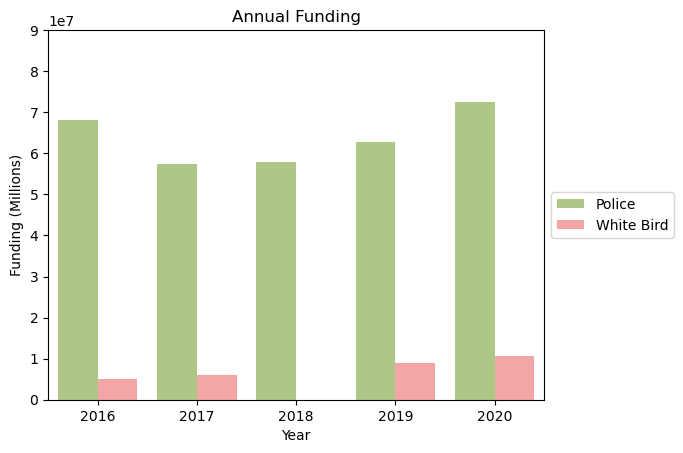

In [19]:
custom_colors = ["#B1D27B", "#FF9999"]

sns.barplot(finance_data, x="Year", y="Funding", hue="Agency", palette=custom_colors)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(0, 90000000)
plt.title("Annual Funding")
plt.ylabel("Funding (Millions)")

plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


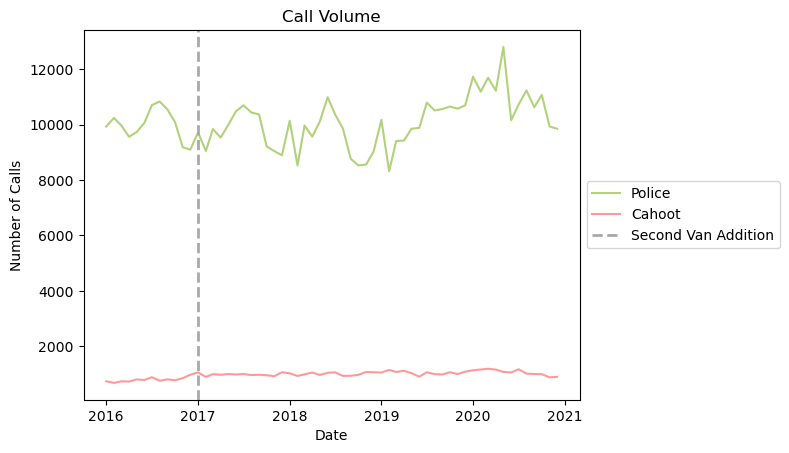

In [20]:
monthly_calls['Year_Month'] = pd.to_datetime(monthly_calls['Year_Month'])

custom_colors = ["#FF9999", "#B1D27B"]
ax = sns.lineplot(monthly_calls, x='Year_Month', y='Call_Volume', hue='PrimaryUnitCallSign', palette=custom_colors)

plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

jan_ticks = [dt for dt in monthly_calls['Year_Month'] if dt.month == 1]
event_date = pd.Timestamp('2017-01-01')

plt.axvline(x=event_date, color='darkgrey', linestyle='--', linewidth=2, label='Second Van Addition')

jan_ticks = [dt for dt in monthly_calls['Year_Month'] if dt.month == 1]

plt.title('Call Volume')

# Get handles and labels
handles, labels = ax.get_legend_handles_labels()

# Reorder the 'Police' label to the top of legend
index = labels.index('Police')
handles = [handles[index]] + handles[:index] + handles[index+1:]
labels = [labels[index]] + labels[:index] + labels[index+1:]

# Recreate the legend
plt.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

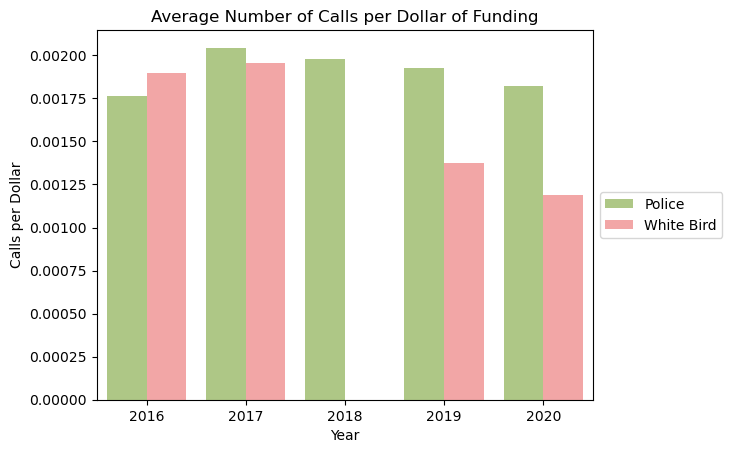

In [10]:
custom_colors = ["#B1D27B", "#FF9999"]

sns.barplot(finance_data, x='Year', y='Call_Per_Funding', hue='Agency', palette=custom_colors)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Average Number of Calls per Dollar of Funding')
plt.ylabel('Calls per Dollar')

plt.show()

In [11]:
daily_calls['Year_Month_Day'] = pd.to_datetime(daily_calls['Year_Month_Day'])

# Define the event date
event_date = pd.Timestamp('2017-01-01')
end_date = pd.Timestamp('2018-01-01')

cahoots_df = daily_calls[daily_calls['PrimaryUnitCallSign'] == 'Cahoots']
police_df = daily_calls[daily_calls['PrimaryUnitCallSign'] == 'Police']

# All before and after event 
before_event = daily_calls[daily_calls['Year_Month_Day'] < event_date]['Call_Volume']
after_event = daily_calls[(daily_calls['Year_Month_Day'] >= event_date) & (daily_calls['Year_Month_Day'] < end_date)]['Call_Volume']

# Cahoots before and after event 
cahoot_before = cahoots_df[cahoots_df['Year_Month_Day'] < event_date]['Call_Volume']
cahoot_after = cahoots_df[(cahoots_df['Year_Month_Day'] >= event_date) & (cahoots_df['Year_Month_Day'] < end_date)]['Call_Volume']

# Other agency before and after event 
police_before = police_df[police_df['Year_Month_Day'] < event_date]['Call_Volume']
police_after = police_df[(police_df['Year_Month_Day'] >= event_date) & (police_df['Year_Month_Day'] < end_date)]['Call_Volume']

t_stat, p_value = stats.ttest_ind(before_event, after_event, equal_var=False)  # Assumes unequal variance
print('P-value:', p_value)
print('')

t_stat, p_value = stats.ttest_ind(cahoot_before, cahoot_after, equal_var=False)  # Assumes unequal variance
print('P-value:', p_value)
print('')

t_stat, p_value = stats.ttest_ind(police_before, police_after, equal_var=False)  # Assumes unequal variance
print('P-value:', p_value)
print('')

P-value: 0.9911985820998885

P-value: 1.0765786889649284e-37

P-value: 0.11133431342349509



In [12]:
# Z-Score test
def z_test_two_proportions(x1, n1, x2, n2, alpha=0.05):
    p1 = x1 / n1
    p2 = x2 / n2
    p = (x1 + x2) / (n1 + n2)
    
    z_score = (p1 - p2) / ((p * (1 - p) * (1/n1 + 1/n2)) ** 0.5)
    p_value = 2 * (1 - norm.cdf(abs(z_score)))
    
    # Output result
    print(f"Z-score: {z_score}")

In [13]:
# Summing Calls
cahoot_before_count = sum(cahoot_before)
cahoot_after_count = sum(cahoot_after)
police_before_count = sum(police_before)
police_after_count = sum(police_after)

total_before = cahoot_before_count + police_before_count
total_after = cahoot_after_count + police_after_count

# Mean Calls
mean_c_before = np.mean(cahoot_before)
mean_c_after = np.mean(cahoot_after)

z_test_two_proportions(cahoot_before_count, total_before,
                       cahoot_after_count, total_after, alpha=0.05)

Z-score: -16.478438907689664


In [14]:
# Call volume before and after addition of van
print(f"Average Cahoots call volume before the addition of a van: {mean_c_before}")
print(f"Average Cahoots call volume after the addtion of a van: {mean_c_after}")

Average Cahoots call volume before the addition of a van: 25.882513661202186
Average Cahoots call volume after the addtion of a van: 32.15890410958904


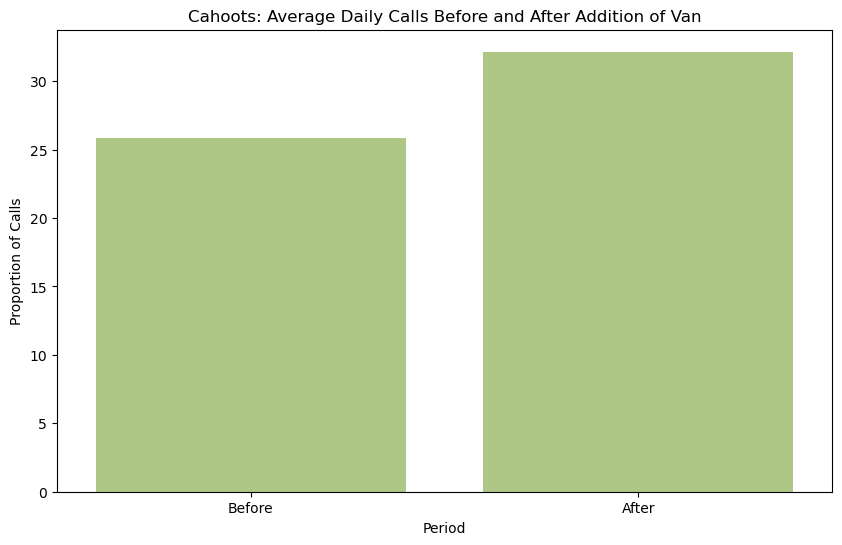

In [15]:
# Calculating proportions
proportions = pd.DataFrame({
    'Agency': ['Cahoots', 'Cahoots'],
    'Event_Occurrence': ['Before', 'After'],
    'Proportion_of_Calls': [
        mean_c_before,
        mean_c_after
    ]
})

plt.figure(figsize=(10, 6))
sns.barplot(data=proportions, x='Event_Occurrence', y='Proportion_of_Calls', color="#B1D27B")
plt.title('Cahoots: Average Daily Calls Before and After Addition of Van')
plt.ylabel('Proportion of Calls')
plt.xlabel('Period')
plt.show()